In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading in the dataset and viewing the first few rows
df_ford = pd.read_csv('updated_cleaned_ford_df.txt')
df_ford.head()

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,Fiesta,2017,12000,Automatic,15944,Petrol,150.0,57.7,1.0
1,1,Focus,2018,14000,Manual,9083,Petrol,150.0,57.7,1.0
2,2,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0
3,3,Fiesta,2019,17500,Manual,10460,Petrol,145.0,40.3,1.5
4,4,Fiesta,2019,16500,Automatic,1482,Petrol,145.0,48.7,1.0


In [3]:
# Removing unwanted column 
df_ford.drop(columns=['Unnamed: 0'], inplace=True)

# Features vs Price

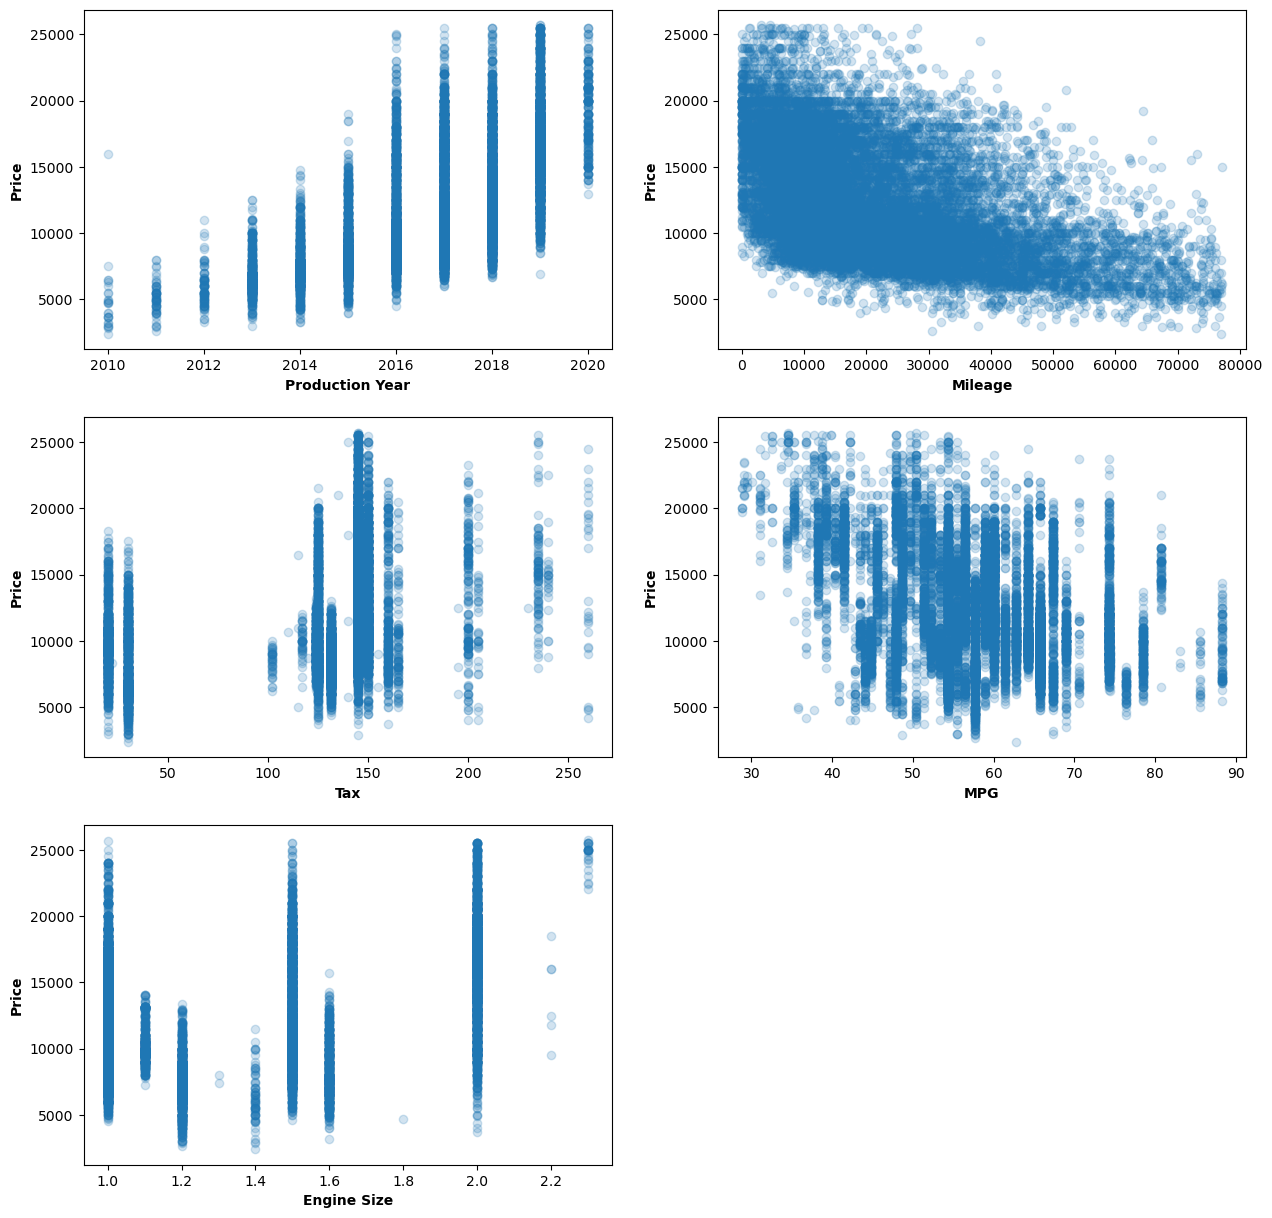

In [4]:
# Visualising the correlation between all numerical features and price
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.scatter(df_ford.year, df_ford.price,alpha=0.2)
plt.xlabel('Production Year', weight='bold')
plt.ylabel('Price', weight='bold')

plt.subplot(3,2,2)
plt.scatter(df_ford.mileage, df_ford.price, alpha=0.2)
plt.xlabel('Mileage', weight='bold')
plt.ylabel('Price', weight='bold')

plt.subplot(3,2,3)
plt.scatter(df_ford.tax, df_ford.price, alpha=0.2)
plt.xlabel('Tax', weight='bold')
plt.ylabel('Price', weight='bold')

plt.subplot(3,2,4)
plt.scatter(df_ford.mpg, df_ford.price, alpha=0.2)
plt.xlabel('MPG', weight='bold')
plt.ylabel('Price', weight='bold')

plt.subplot(3,2,5)
plt.scatter(df_ford.engineSize, df_ford.price, alpha=0.2)
plt.xlabel('Engine Size', weight='bold')
plt.ylabel('Price', weight='bold')
plt.show()

# Spread Of Mileage For Each Fuel Type

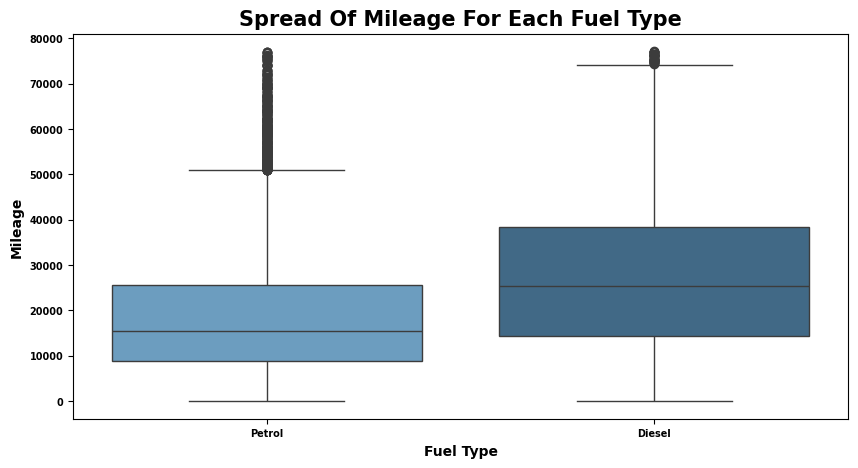

In [5]:
# Visualising the distribution of mileage for each value in fueltype
plt.figure(figsize=(10,5))
sns.boxplot(data=df_ford, x='fuelType', y='mileage', palette='Blues_d', legend=False, hue ='fuelType')
plt.title('Spread Of Mileage For Each Fuel Type', weight='bold', size=15)
plt.xlabel('Fuel Type', weight='bold')
plt.ylabel('Mileage', weight='bold')
plt.xticks(size=7, weight='bold')
plt.yticks(size=7, weight='bold')
plt.show()

# Spread Of Price For Each Transmission

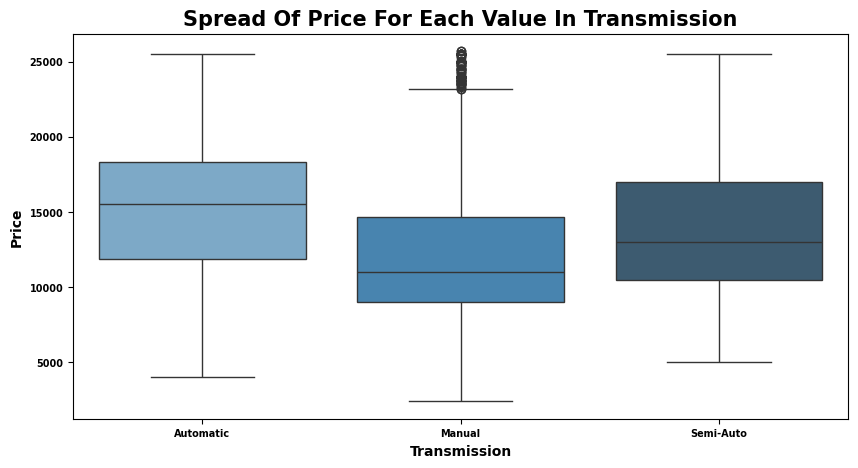

In [6]:
# Visualising the distribution of price for each value in transmission
plt.figure(figsize=(10,5))
sns.boxplot(data=df_ford, x='transmission', y='price', palette='Blues_d', legend=False, hue='transmission')
plt.title('Spread Of Price For Each Value In Transmission', weight='bold', size=15)
plt.xlabel('Transmission', weight='bold')
plt.ylabel('Price', weight='bold')
plt.xticks(size=7, weight='bold')
plt.yticks(size=7, weight='bold')
plt.show()

# Most Expensive Models

In [7]:
# Calculating the avg price for each model
models_price = df_ford.groupby('model')['price'].agg('mean').reset_index()
# Sorting the avg price from most expensive to least for the top 10 models
price_sorted = models_price.sort_values('price', ascending=False).head(10)

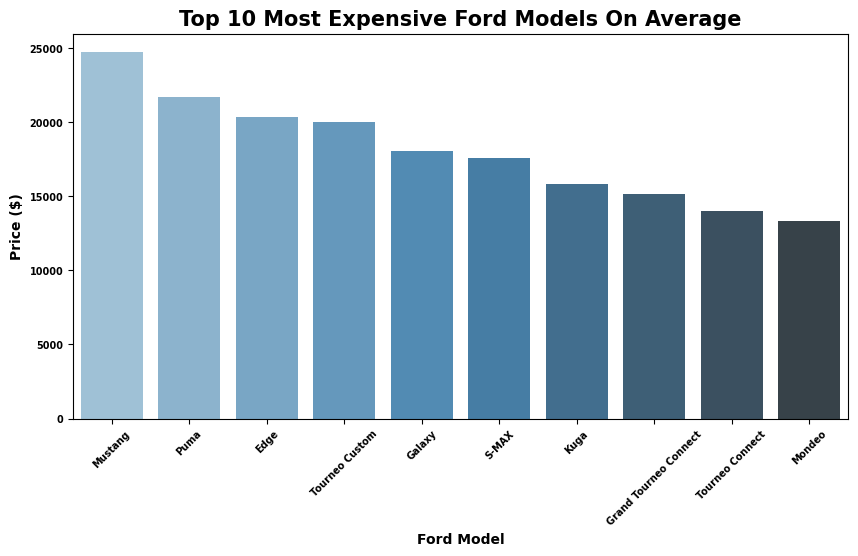

In [8]:
# Visualising the most expensive used ford models on average
plt.figure(figsize=(10,5))
sns.barplot(x = 'model', y = 'price', data = price_sorted, palette='Blues_d', legend=False, hue ='model')
plt.title('Top 10 Most Expensive Ford Models On Average', weight='bold', size=15)
plt.xlabel('Ford Model', weight='bold')
plt.ylabel('Price ($)', weight='bold')
plt.xticks(size=7, rotation=45, weight='bold')
plt.yticks(size=7, weight='bold')
plt.show()

# Models With The Best MPG

In [9]:
# Calculating the avg mpg for each model
df_mpg = df_ford.groupby('model')['mpg'].agg('mean').reset_index()
# Sorting the avg mpg from highest to lowest for the top 10
df_mpg_sorted = df_mpg.sort_values('mpg', ascending=False).head(10)

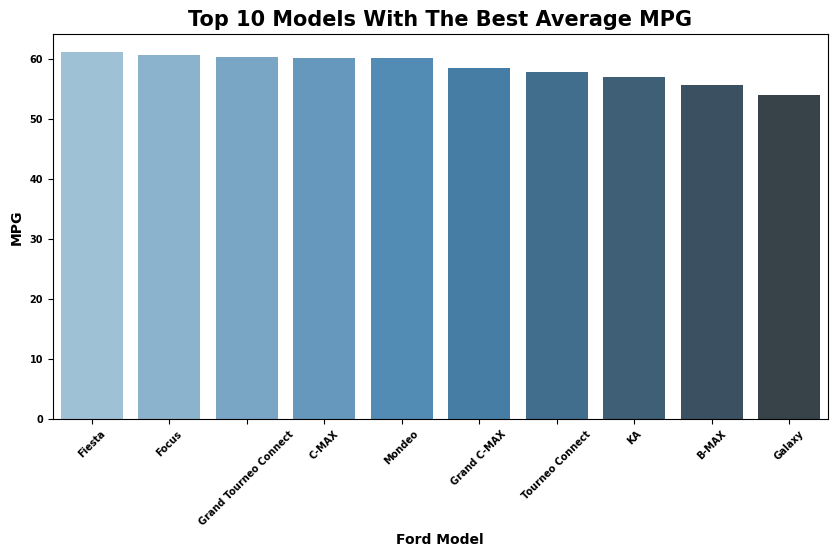

In [10]:
# Visualising the models with the best mpg
plt.figure(figsize=(10,5))
sns.barplot(data=df_mpg_sorted, x='model', y='mpg', palette='Blues_d', legend=False, hue='model')
plt.title('Top 10 Models With The Best Average MPG', weight='bold', size=15)
plt.xlabel('Ford Model', weight='bold')
plt.ylabel('MPG', weight='bold')
plt.xticks(size=7, rotation=45, weight='bold')
plt.yticks(size=7, weight='bold')
plt.show()

# Average Price Each Production Year

In [11]:
# Calculating the avg price each year
df_year_avg_price = df_ford.groupby('year')['price'].agg('mean').reset_index()

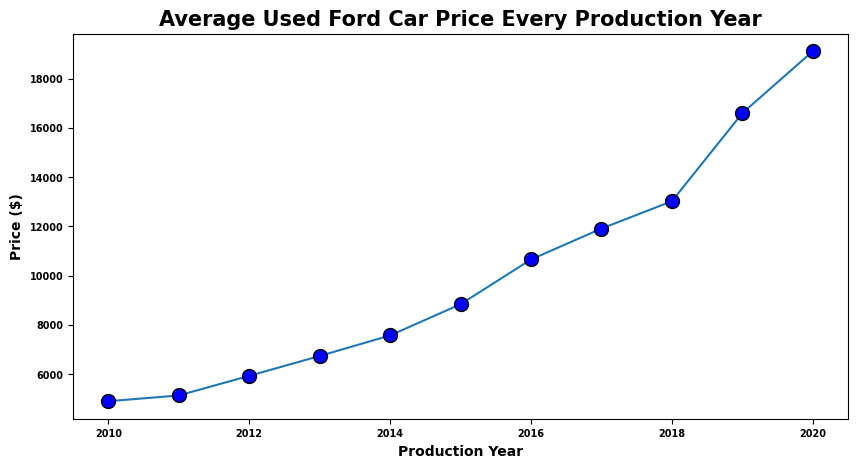

In [12]:
# Visualising the average car price each year
plt.figure(figsize=(10,5))
plt.plot(df_year_avg_price.year, df_year_avg_price.price, marker='o', markerfacecolor='blue', markeredgecolor='black', markersize=10)
plt.title('Average Used Ford Car Price Every Production Year', weight='bold', size=15)
plt.xlabel('Production Year', weight='bold')
plt.ylabel('Price ($)', weight='bold')
plt.xticks(size=7, weight='bold')
plt.yticks(size=7, weight='bold')
plt.show()

# Average MPG Each Production Year

In [13]:
# Calculating the avg mpg for each year
year_mpg = df_ford.groupby('year')['mpg'].agg('mean').reset_index()

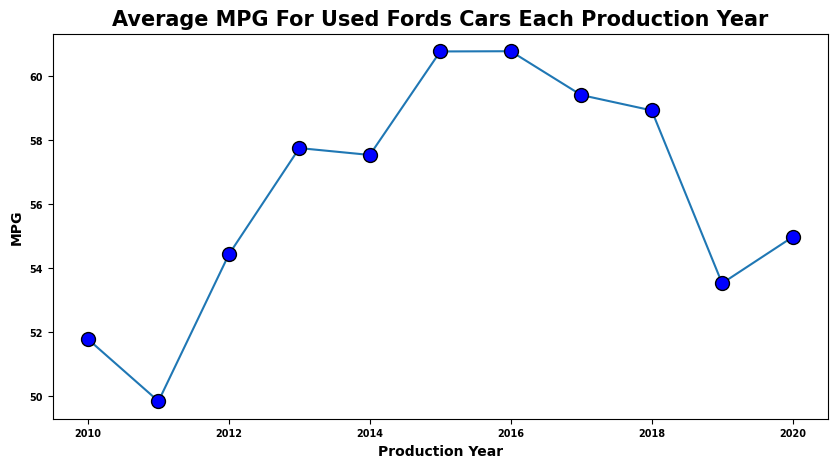

In [14]:
# Visualising the average mpg for cars each year
plt.figure(figsize=(10,5))
plt.plot(year_mpg.year, year_mpg.mpg, marker='o', markerfacecolor='blue', markeredgecolor='black', markersize=10)
plt.title('Average MPG For Used Fords Cars Each Production Year', weight='bold', size=15)
plt.xlabel('Production Year', weight='bold')
plt.ylabel('MPG', weight='bold')
plt.xticks(size=7, weight='bold')
plt.yticks(size=7, weight='bold')
plt.show()

# Split Of Different Fuel Types

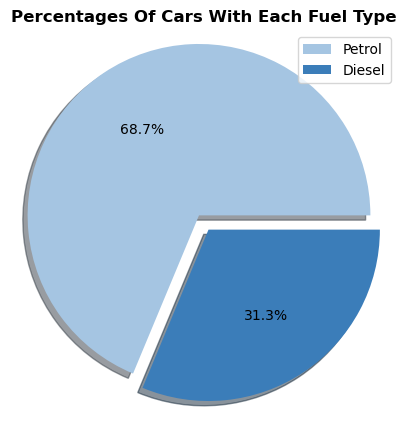

In [15]:
# Getting the counts for each fuel type
df_fuelType = df_ford.fuelType.value_counts()
explode=(0, 0.1)
color = ['#a5c5e2', '#3b7db9']

# Visualising the percentage of petrol cars and diesel cars
plt.figure(figsize=(5,5))
plt.pie(df_fuelType, explode=explode, shadow=True, autopct='%0.1f%%', colors=color)
plt.title('Percentages Of Cars With Each Fuel Type', weight='bold')
plt.axis('equal')
plt.legend(['Petrol', 'Diesel'])
plt.show()

# Split Of Different Transmissions

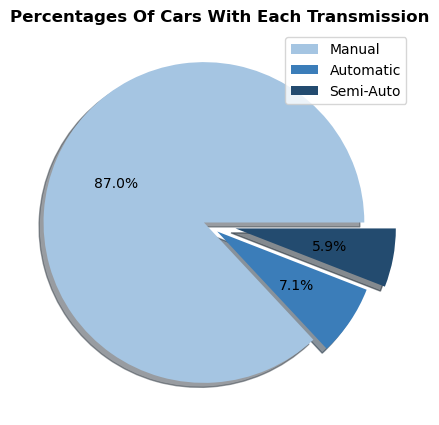

In [16]:
# Getting the counts for each transmission
df_transmission = df_ford.transmission.value_counts()
explode_2 = (0, 0.1, 0.2)
color_2 = ['#a5c5e2', '#3b7db9', '#234b6f']

# Visualising the percentage of manual, semi auto and automatic cars
plt.figure(figsize=(5,5))
plt.pie(df_transmission, autopct='%0.1f%%', colors=color_2, explode=explode_2, shadow=True)
plt.title('Percentages Of Cars With Each Transmission', weight='bold')
plt.axis('equal')
plt.legend(['Manual', 'Automatic','Semi-Auto'])
plt.show()